In [2]:
import os
if 'notebooks' in os.getcwd():
    os.chdir('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Visualizing data

In [3]:
quizz_df = pd.read_csv('data/quizz_07-11_21-11.csv')
user_df = pd.read_csv('data/user_07-11_21-11.csv')
video_df = pd.read_csv('data/video_07-11_21-11.csv')
video_analytics_df = pd.read_csv('data/video_analytics_07-11_21-11.csv')

In [4]:
video_analytics_df.head()

,id,user_id,video_id,has_been_on_quizz,number_of_loops,watch_time,position_when_leave,datetime,time_spent,origin,nb_pause
0,18071,7651,2198,False,0,7819,5,2022-11-07 22:12:15.449098,7822,UserProfile,2
1,18072,37702,899,False,0,98186,74,2022-11-07 22:13:16.047639,98186,FYP,1
2,18073,37702,899,False,0,21139,96,2022-11-07 22:13:38.049122,21139,FYP,0
3,18339,125,2761,False,1,92920,110,2022-11-08 08:11:46.030612,92920,MyProfile,0
4,18340,36674,2137,False,0,3419,1,2022-11-08 08:11:52.843675,3577,FYP,0


In [5]:
user_df = user_df.rename(columns={'id':'user_id'})
user_df.head()

,user_id,username,niveau_id,points
0,1345,Sami,4.0,10751
1,36074,study.bryan,1.0,2289
2,38041,yooooa,1.0,0
3,38042,tom.lmbs,4.0,0
4,38045,Henri.srn,1.0,1378


In [6]:
video_df = video_df.rename(columns={'id':'video_id'})
video_df.head()

,video_id,duration,niveau_id,master_chapter_id,number_bulbs,duration-2,score_fyp
0,468,179.562,1,1,11,179.562,-0.394623
1,140,69.173,1,1,9,69.173,-0.623247
2,3177,159.220,1,5,1,159.220,-0.128298
3,189,48.034,1,4,4,48.034,-1.052262
4,143,165.605,1,1,0,165.605,-1.891019


In [7]:
quizz_df.head()

,user_id,quizz_id,datetime
0,38110,151,2022-11-07 11:10:07.132989
1,37181,565,2022-11-07 11:50:31.291585
2,37181,566,2022-11-07 11:50:45.08376
3,150,258,2022-11-07 12:02:25.41876
4,11844,473,2022-11-07 12:16:11.288728


In [8]:
video_analytics_df['datetime'] = pd.to_datetime(video_analytics_df['datetime'])
video_analytics_df['week'] = video_analytics_df['datetime'].dt.isocalendar().week
video_analytics_df['day'] = video_analytics_df['datetime'].dt.isocalendar().day
video_analytics_df.sort_values(by=['user_id','datetime']).head()

,id,user_id,video_id,has_been_on_quizz,number_of_loops,watch_time,position_when_leave,datetime,time_spent,origin,nb_pause,week,day
10144,26944,3,657,False,0,112830,16,2022-11-16 13:13:51.392773,116978,MostPopular,0,46,3
11922,28722,3,755,False,0,9101,6,2022-11-18 15:45:45.229443,9604,SubChapter,1,46,5
1614,16986,18,2318,False,0,1550,2,2022-11-07 10:06:23.102423,1550,FYP,0,45,1
1989,17215,18,2356,False,0,18291,0,2022-11-07 13:45:42.292286,18017,FYP,0,45,1
2108,17334,18,2408,False,0,7942,7,2022-11-07 15:54:54.951457,7942,FYP,0,45,1


In [9]:
video_analytics_df.groupby('user_id')\
    .nunique()

,id,video_id,has_been_on_quizz,number_of_loops,watch_time,position_when_leave,datetime,time_spent,origin,nb_pause,week,day
user_id,,,,,,,,,,,,
3,2,2,1,1,2,2,2,2,2,2,1,2
18,152,137,1,4,152,36,152,152,6,3,2,7
106,2,2,1,1,2,2,2,2,1,1,1,1
107,6,6,1,1,6,4,6,6,1,1,1,1
108,95,71,2,3,93,31,95,93,6,3,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
38378,3,3,1,1,3,2,3,3,1,1,1,1
38379,83,69,2,2,83,37,83,83,1,3,1,1
38380,5,5,1,2,5,4,5,5,2,2,1,1


In [10]:
# relating user_id and weeks
user_weeks_df = video_analytics_df['week'].groupby(video_analytics_df['user_id'])\
    .unique()
user_weeks_df.head()

user_id
3          [46]
18     [45, 46]
106        [46]
107        [45]
108    [45, 46]
Name: week, dtype: object

In [11]:
# considering only users from week 45
# checking if the user has accessed the app on week 46
target_df = user_weeks_df.loc[[(45 in x) for x in user_weeks_df]]\
    .str.len()\
    .replace({1: False, 2: True})\
    .reset_index(name='recurring_user')
target_df.head()

,user_id,recurring_user
0,18,True
1,107,False
2,108,True
3,113,True
4,114,True


In [12]:
# complete dataframe
complete_df = target_df.merge(video_analytics_df, on=['user_id'])\
    .merge(user_df, on=['user_id'])\
    #.merge(video_df, on=['video_id'])
target_df

,user_id,recurring_user
0,18,True
1,107,False
2,108,True
3,113,True
4,114,True
...,...,...
411,38245,False
412,38246,False
413,38247,False
414,38248,False


## Users Related Data

In [39]:
complete_df = complete_df.merge(video_df[['video_id','number_bulbs']])

In [62]:
complete_df.head()

,user_id,recurring_user,id,video_id,has_been_on_quizz,number_of_loops,watch_time,position_when_leave,datetime,time_spent,...,nb_pause,week,day,username,niveau_id,points,video_views,number_bulbs,bulbs_ratio,video_watchers
0,18,True,19719,837,False,0,2244,1,2022-11-09 13:19:32.840044,2244,...,0,45,3,Gperrot,1.0,2771,NaN,31,NaN,NaN
1,36074,True,28134,837,True,0,1935,1,2022-11-17 20:41:19.737790,3695,...,0,46,4,study.bryan,1.0,2289,NaN,31,NaN,NaN
2,36074,True,28135,837,True,0,1465,0,2022-11-17 20:41:26.039936,4250,...,1,46,4,study.bryan,1.0,2289,NaN,31,NaN,NaN
3,37433,True,18897,837,False,0,7846,7,2022-11-08 16:51:51.341476,7847,...,0,45,2,gaet_gaet,4.0,16,NaN,31,NaN,NaN
4,37834,True,24043,837,False,0,1747,1,2022-11-12 19:26:21.736304,1747,...,0,45,6,nathaelj,4.0,916,NaN,31,NaN,NaN


In [14]:
users_target_df = complete_df[complete_df['week'] == 45].groupby('user_id').agg(\
    recurring_user=pd.NamedAgg(column='recurring_user', aggfunc='mean'),\
    number_of_videos=pd.NamedAgg(column='video_id', aggfunc='count'),\
    total_time=pd.NamedAgg(column='time_spent', aggfunc='sum'),\
    niveau_id=pd.NamedAgg(column='niveau_id', aggfunc='max'),\
    points=pd.NamedAgg(column='points', aggfunc='mean'),\
    active_days=pd.NamedAgg(column='day', aggfunc=pd.Series.nunique)
    )
users_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 18 to 38249
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recurring_user    416 non-null    bool   
 1   number_of_videos  416 non-null    int64  
 2   total_time        416 non-null    int64  
 3   niveau_id         410 non-null    float64
 4   points            416 non-null    int64  
 5   active_days       416 non-null    UInt32 
dtypes: UInt32(1), bool(1), float64(1), int64(3)
memory usage: 18.7 KB


In [15]:
users_target_df

,recurring_user,number_of_videos,total_time,niveau_id,points,active_days
user_id,,,,,,
18,True,97,1321161,1.0,2771,6
107,False,6,46793,1.0,309,1
108,True,65,899796,4.0,5975,5
113,True,256,3133011,4.0,3120,7
114,True,30,588199,1.0,748,3
...,...,...,...,...,...,...
38245,False,12,47527,1.0,0,1
38246,False,18,167509,1.0,0,1
38247,False,3,102332,1.0,0,1


In [16]:
users_target_df['niveau_id'] = users_target_df['niveau_id'].fillna(0)
users_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 18 to 38249
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   recurring_user    416 non-null    bool   
 1   number_of_videos  416 non-null    int64  
 2   total_time        416 non-null    int64  
 3   niveau_id         416 non-null    float64
 4   points            416 non-null    int64  
 5   active_days       416 non-null    UInt32 
dtypes: UInt32(1), bool(1), float64(1), int64(3)
memory usage: 18.7 KB


In [17]:
users_target_df.corr()\
    .round(2)\
    .loc['recurring_user']\
    .sort_values()
    #.style.background_gradient(axis=None)

niveau_id           0.10
total_time          0.25
points              0.27
number_of_videos    0.41
active_days         0.55
recurring_user      1.00
Name: recurring_user, dtype: float64

In [18]:
features_user = users_target_df.columns[users_target_df.columns != 'recurring_user']
X_users = users_target_df[features_user]
y_users = users_target_df['recurring_user']

In [19]:
from sklearn.linear_model import LogisticRegression
model_users = LogisticRegression()
model_users.fit(X_users,y_users)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_users, model_users.predict_proba(X_users)[:,1])

0.8135851537519052

## Data Analysis

In [20]:
# calculating the retention rate
retention_rate = target_df['recurring_user'].value_counts(normalize=True)
retention_rate

False    0.737981
True     0.262019
Name: recurring_user, dtype: float64

c:\Users\sabri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Users Retention Distribution')

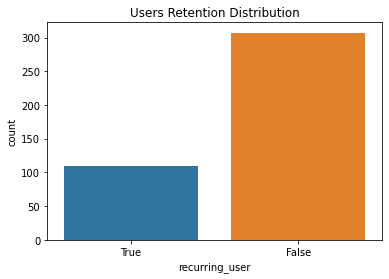

In [21]:
plt.figure()
sns.countplot('recurring_user', data=target_df, order=[True, False])\
    .set_title('Users Retention Distribution')

In [22]:
users_target_df

,recurring_user,number_of_videos,total_time,niveau_id,points,active_days
user_id,,,,,,
18,True,97,1321161,1.0,2771,6
107,False,6,46793,1.0,309,1
108,True,65,899796,4.0,5975,5
113,True,256,3133011,4.0,3120,7
114,True,30,588199,1.0,748,3
...,...,...,...,...,...,...
38245,False,12,47527,1.0,0,1
38246,False,18,167509,1.0,0,1
38247,False,3,102332,1.0,0,1


In [23]:
X_df = users_target_df.copy()
# X_df['recurring_user'] = X_df['recurring_user'].replace({
#     True:'yes',
#     False:'no'
# })
# X_df.set_index(['recurring_user'],inplace=True)
X_df

,recurring_user,number_of_videos,total_time,niveau_id,points,active_days
user_id,,,,,,
18,True,97,1321161,1.0,2771,6
107,False,6,46793,1.0,309,1
108,True,65,899796,4.0,5975,5
113,True,256,3133011,4.0,3120,7
114,True,30,588199,1.0,748,3
...,...,...,...,...,...,...
38245,False,12,47527,1.0,0,1
38246,False,18,167509,1.0,0,1
38247,False,3,102332,1.0,0,1


(0.0, 70.0)

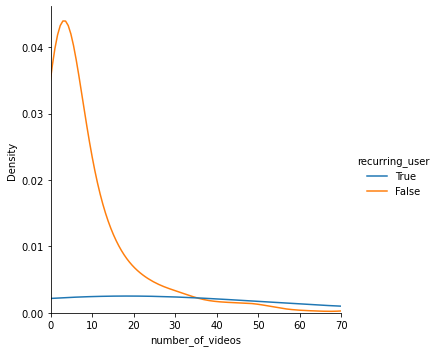

In [24]:
sns.displot(
    data=X_df,
    x='number_of_videos',
    hue='recurring_user',
    kind='kde',
    hue_order=[True, False]
)
plt.xlim([0,70])

<AxesSubplot:xlabel='active_days', ylabel='count'>

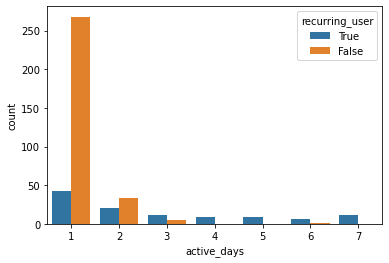

In [25]:
sns.countplot(
    data=X_df,
    x='active_days',
    hue='recurring_user',
    hue_order=[True, False]
)

In [26]:
# X_df[['recurring_user','active_days']]\
#     [X_df['recurring_user']==True]\
#     [X_df['active_days']>3]\
#     .groupby('active_days')\
#     .count()\
#     .sum()
X_df[['recurring_user','number_of_videos']]\
[X_df['recurring_user']==True]\
[X_df['number_of_videos']>35]\
.groupby('number_of_videos')\
.count()\
.sum()

<ipython-input-26-62ebf670caf1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_df[['recurring_user','number_of_videos']]\


recurring_user    38
dtype: int64

In [27]:
# X_df[['recurring_user','active_days']]\
#     [X_df['recurring_user']==False]\
#     [X_df['active_days']>3]\
#     .groupby('active_days')\
#     .count()\
#     .sum()
X_df[['recurring_user','number_of_videos']]\
[X_df['recurring_user']==False]\
[X_df['number_of_videos']>35]\
.groupby('number_of_videos')\
.count()\
.sum()

<ipython-input-27-dfb91ad5ba85>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_df[['recurring_user','number_of_videos']]\


recurring_user    17
dtype: int64

In [28]:
table1 = users_target_df.corr()\
    .style.background_gradient(axis=None)
table1.to_excel('tabrev.xlsx')

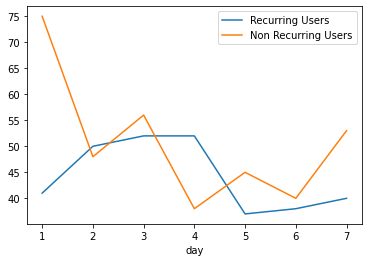

In [29]:
graph1_df = complete_df[complete_df['week'] == 45][['user_id', 'day', 'recurring_user']]

graph1_df.query('recurring_user==True')\
    .drop_duplicates(['user_id','day'])\
    .groupby('day')\
    .user_id\
    .nunique()\
    .plot(
        label='Recurring Users'
        )

graph1_df.query('recurring_user==False')\
    .drop_duplicates(['user_id','day'])\
    .groupby('day')\
    .user_id\
    .nunique()\
    .plot(
        label='Non Recurring Users'
    )
plt.legend()


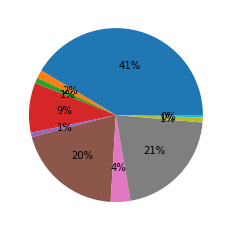

In [30]:
piedf = complete_df[complete_df['week'] == 45]\
    .groupby('origin')\
    .video_id\
    .nunique()
plt.pie(piedf, autopct='%.0f%%')
plt.show()

In [31]:
piedf

origin
FYP             973
Folder           36
MostPopular      24
MyProfile       218
Notif            19
SubChapter      468
TopSection       86
UserProfile     492
VideoSection     22
na               10
Name: video_id, dtype: int64

## Video Related Data (bulbs)

In [ ]:
videos_aux_df = complete_df[complete_df['week'] == 45][['user_id','video_id']]\
    .merge(target_df, on='user_id')\
    .set_index('video_id')\
    .sort_values(by='video_id')
videos_aux_df_2 = videos_aux_df.groupby('video_id').agg(\
    total_watchers=pd.NamedAgg(column='user_id', aggfunc=pd.Series.nunique)
    )
videos_aux_df_3 = videos_aux_df[videos_aux_df['recurring_user']==True]\
    .groupby('video_id')\
    .nunique()\
    .rename(columns={'user_id':'recurring_watchers'})
videos_aux_df = videos_aux_df_2.merge(videos_aux_df_3['recurring_watchers'], on='video_id')
videos_aux_df['recurrence_rate_watchers'] = videos_aux_df.recurring_watchers / videos_aux_df.total_watchers
videos_aux_df = videos_aux_df.merge(video_df[['number_bulbs','video_id']], on='video_id')

videos_aux_df.set_index('video_id')

,total_watchers,recurring_watchers,recurrence_rate_watchers,number_bulbs
video_id,,,,
134,25,12,0.480000,158
140,2,1,0.500000,9
147,1,1,1.000000,13
148,11,6,0.545455,111
149,36,18,0.500000,117
...,...,...,...,...
2953,1,1,1.000000,1
2954,1,1,1.000000,1
2955,1,1,1.000000,2


In [ ]:
videos_aux_df = videos_aux_df.set_index('video_id')
videos_aux_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 134 to 2957
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_watchers            1396 non-null   int64  
 1   recurring_watchers        1396 non-null   int64  
 2   recurrence_rate_watchers  1396 non-null   float64
 3   number_bulbs              1396 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 54.5 KB


In [ ]:
table2 = videos_aux_df.corr()\
    .style.background_gradient(axis=None)
table2

,total_watchers,recurring_watchers,recurrence_rate_watchers,number_bulbs
total_watchers,1.000000,0.901048,-0.430615,0.584900
recurring_watchers,0.901048,1.000000,-0.361967,0.325512
recurrence_rate_watchers,-0.430615,-0.361967,1.000000,-0.173461
number_bulbs,0.584900,0.325512,-0.173461,1.000000
